In [1]:
using Plots
# Ensure that the Plots package is using a backend that supports polar plots
# For example, the GR backend is a good choice
gr()

Plots.GRBackend()

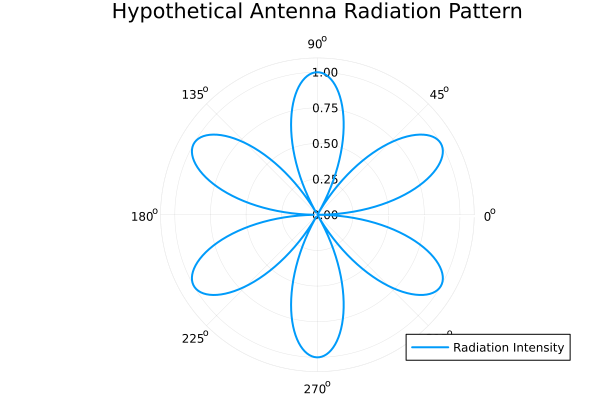

In [2]:
# Define the angles from 0 to 2π (360 degrees)
θ = range(0, stop=2π, length=360)

# Create a simple sinusoidal radiation pattern
# The actual radiation pattern would depend on the antenna design
radiation_intensity = abs.(sin.(3*θ))

# Create a polar plot using the correct projection keyword
plot(θ, radiation_intensity, proj=:polar, title="Hypothetical Antenna Radiation Pattern",
     label="Radiation Intensity", linewidth=2)


In [7]:
using Plots

# Use the GR backend which supports 3D plotting
gr()

# Define the angles for theta (0 to π) and phi (0 to 2π)
θ = range(0, stop=π, length=100)  # Polar angle from the z-axis
ϕ = range(0, stop=2π, length=100)  # Azimuthal angle in the xy-plane

# Generate a meshgrid for theta and phi using broadcasting
θ_grid = repeat(reshape(θ, 1, :), length(ϕ), 1)
ϕ_grid = repeat(reshape(ϕ, :, 1), 1, length(θ))

# Example radiation pattern: |sin(3θ) * cos(ϕ)|
# This is a simple, hypothetical model and can be changed to model actual antenna patterns
radiation_intensity = abs.(sin.(3 .* θ_grid) .* cos.(ϕ_grid))

# Convert spherical to Cartesian coordinates for plotting
x = radiation_intensity .* sin.(θ_grid) .* cos.(ϕ_grid)
y = radiation_intensity .* sin.(θ_grid) .* sin.(ϕ_grid)
z = radiation_intensity .* cos.(θ_grid)

# 3D surface plot
s = surface(x, y, z, title="3D Radiation Pattern", xlabel="X", ylabel="Y", zlabel="Z",
        color=:viridis, legend=false, xrot=45 )
savefig(s,"images/3d_radiation.png");

<img src=images/3d_radiation.png weigth='' height='' > </img>

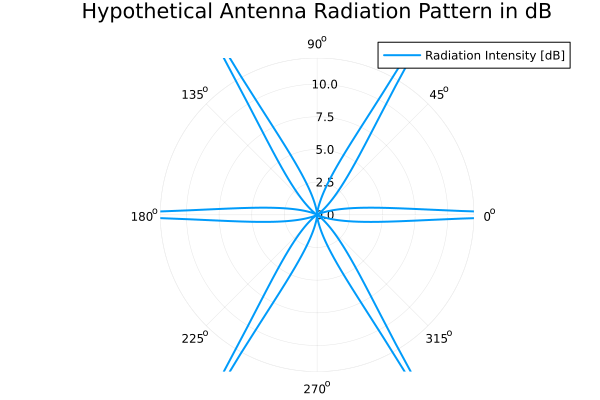

In [6]:
using Plots

# Use the GR backend for plotting
gr()

# Define the angles from 0 to 2π (360 degrees)
θ = range(0, stop=2π, length=360)

# Create a simple sinusoidal radiation pattern
# The actual radiation pattern would depend on the antenna design
radiation_intensity = abs.(sin.(3*θ))

# Convert radiation intensity to dB, using a small offset to avoid log(0)
radiation_intensity_db = 10 .* log10.(radiation_intensity .+ 1e-12)  # Adding 1e-12 to avoid taking log of zero

# Create a polar plot using the correct projection keyword
plot(θ, radiation_intensity_db, proj=:polar, title="Hypothetical Antenna Radiation Pattern in dB",
     label="Radiation Intensity [dB]", linewidth=2)
